In [2]:
import numpy as np
from scipy.spatial.distance import euclidean
import _ucrdtw
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sns
from sklearn.cluster import SpectralClustering
import nibabel as nib
from sklearn import preprocessing

base_scaled = np.load('../../../Results/Pig 2/Base/embeddings-squished.npy')
raw = np.load("./fmri_preprocessed_2017_09_18.npy")
mask = np.load('/home/chris/projects/rfmri/Data/pig_2/brandon/mask_2017_09_18.npy')
anatomical = nib.load('/home/chris/projects/rfmri/Data/pig_2/coregistered_anatomy.nii').get_data()
x,y,z = mask.nonzero()

In [4]:
parent_folder = 'DTW Full Set Cluster'
gamma_string = 'Gamma 001'

#slice_mask = ((z >= 7) & (z <= 16))
slice_mask = (z >= 0)
new_x = x[slice_mask]
new_y = y[slice_mask]
new_z = z[slice_mask] 

In [7]:
# Generate 1 Figure Per Each Cluster with 10 Slices (Slice 7 - 17)

for cluster_num in range(2,6):
    labels = np.load('./' + parent_folder + '/' + gamma_string + '/dtw_' + str(cluster_num) + '_clusters.npy')
    unique_labels = np.unique(labels)
    rgbs = [np.array(c) for c in sns.color_palette("bright", len(unique_labels))]
    assert(len(new_x) == len(labels))
    
    for label_i in range(len(unique_labels)):
        plt.figure(figsize=(40,20))
        label_of_interest = unique_labels[label_i]
        for slice_i in range(7,17):
            plt.subplot(2,5,slice_i-6)
            plt.imshow(anatomical[:,:,slice_i], cmap='viridis')
            for i in range(new_x.shape[0]):
                if new_z[i] == slice_i and labels[i] == label_of_interest:
                    pass
                    plt.scatter(x=new_y[i], y=new_x[i], c='r', s=3)

        plt.savefig('./' + parent_folder + '/' + gamma_string + '/' + str(len(unique_labels)) + '_clusters_cluster_' + str(label_of_interest)+ '.png')
        plt.close('all')
        
        
# Generate 1 Figure Per Clustering (Combined Clusters) with 10 Slices (Slice 7 - 17)

for cluster_num in range(2,6):
    labels = np.load('./' + parent_folder + '/' + gamma_string + '/dtw_' + str(cluster_num) + '_clusters.npy')
    unique_labels = np.unique(labels)
    rgbs = [np.array(c) for c in sns.color_palette("bright", len(unique_labels))]
    assert(len(new_x) == len(labels))
    
    plt.figure(figsize=(40,20))
    for slice_i in range(7,17):
        plt.subplot(2,5,slice_i-6)
        plt.imshow(anatomical[:,:,slice_i], cmap='viridis')
        for i in range(new_x.shape[0]):
            if new_z[i] == slice_i:
                pass
                plt.scatter(x=new_y[i], y=new_x[i], c=rgbs[labels[i]], s=3)

    plt.savefig('./' + parent_folder + '/' + gamma_string + '/' + str(len(unique_labels)) + '_clusters_combined.png')
    plt.close('all')

/home/chris/projects/rfmri/pig/envi/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


4575
1564
4154
2126
4066


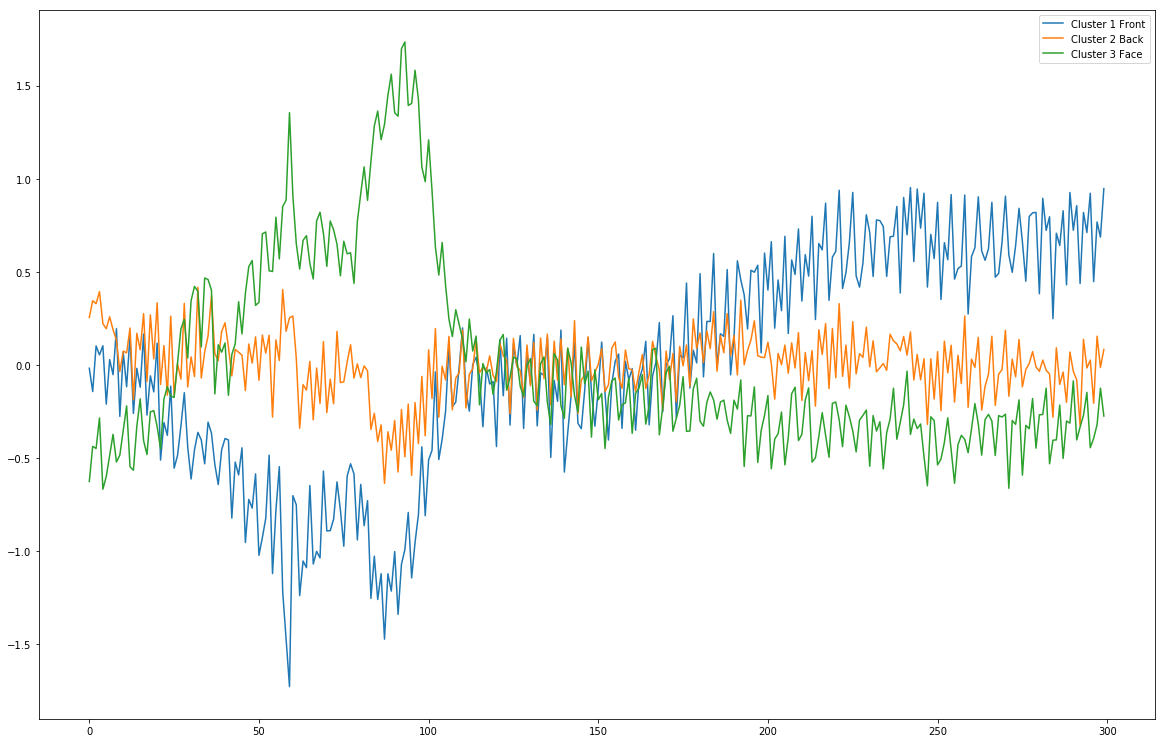

In [54]:
data = np.transpose(raw)
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
data = np.transpose(data)
data = np.expand_dims(data, axis=2)

labels = np.load('./' + parent_folder + '/' + gamma_string + '/dtw_5_clusters.npy')
cluster_0_voxels = data[labels==0]
cluster_1_voxels = data[labels==1]
cluster_2_voxels = data[labels==2]
cluster_3_voxels = data[labels==3]
cluster_4_voxels = data[labels==4]

print(len(cluster_0_voxels))
print(len(cluster_1_voxels))
print(len(cluster_2_voxels))
print(len(cluster_3_voxels))
print(len(cluster_4_voxels))

cluster_0_average = np.zeros((300))
cluster_1_average = np.zeros((300))
cluster_2_average = np.zeros((300))
cluster_3_average = np.zeros((300))
cluster_4_average = np.zeros((300))

for i in range(300):
    point_average = np.average(cluster_0_voxels[:, i])
    cluster_0_average[i] = point_average
    point_average = np.average(cluster_1_voxels[:, i])
    cluster_1_average[i] = point_average
    point_average = np.average(cluster_2_voxels[:, i])
    cluster_2_average[i] = point_average
    point_average = np.average(cluster_3_voxels[:, i])
    cluster_3_average[i] = point_average
    point_average = np.average(cluster_4_voxels[:, i])
    cluster_4_average[i] = point_average
    
plt.figure(figsize=(20, 60))
plt.subplot(4,1,1)
#plt.plot(cluster_0_average, label='Cluster 0')
plt.plot(cluster_1_average, label='Cluster 1 Front')
plt.plot(cluster_2_average, label='Cluster 2 Back')
plt.plot(cluster_3_average, label='Cluster 3 Face')
#plt.plot(cluster_4_average, label='Cluster 4')

plt.legend()
# np.average
# for i in range(len(cluster_3_voxels)):
#     np.average(cluster_3_voxels[])
#     plt.plot(cluster_3_voxels[i])
# plt.subplot(4,1,2)
# plt.plot(cluster_1_voxels[0])
# plt.plot(cluster_1_voxels[1])
# plt.plot(cluster_1_voxels[1000])
# plt.subplot(4,1,3)
# plt.plot(cluster_3_voxels[0])
# plt.plot(cluster_1_voxels[0])
# plt.subplot(4,1,4)
# plt.plot(cluster_3_voxels[1])
# plt.plot(cluster_1_voxels[1])

138
188
(300,)


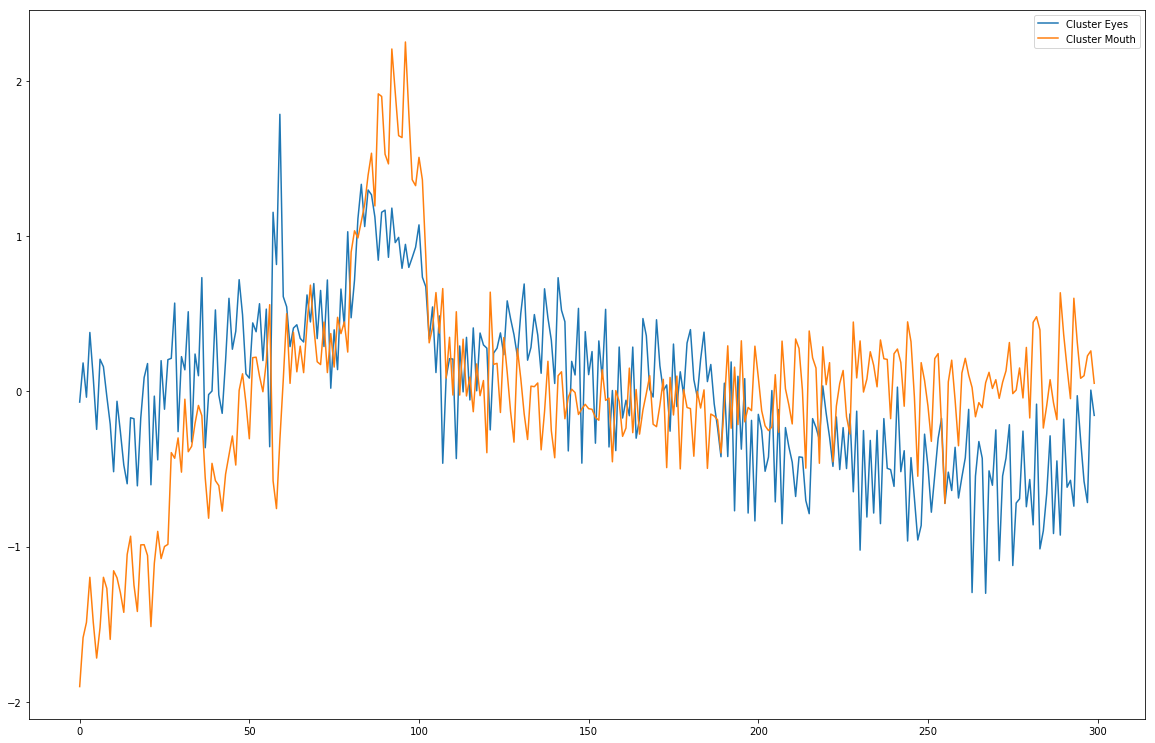

In [73]:
labels = np.load('/home/chris/projects/rfmri/pig/Pig 2/Autoencoder/Kernels32_64_128_256_Filters40_10_5_5/Gamma 01/time_4_5_clusters.npy')
labels_brandon = np.load('/home/chris/projects/rfmri/pig/Pig 2/Autoencoder/Brandon Model/Gamma 01/filter_2_5_clusters.npy')

slice_mask = ((z >= 7) & (z <= 16))
slice_7_17_x = x[slice_mask]
slice_7_17_y = y[slice_mask]
slice_7_17_z = z[slice_mask] 
slice_7_17_data = data[slice_mask]


slice_10_labels = labels[slice_7_17_z==10]
slice_10_labels_brandon = labels_brandon[slice_7_17_z==10]
slice_10_data = slice_7_17_data[slice_7_17_z==10]

slice_10_data_eyes = slice_10_data[slice_10_labels==3]
slice_10_data_mouth = slice_10_data[slice_10_labels_brandon==0]

print(len(slice_10_data_eyes))
print(len(slice_10_data_mouth))

cluster_eyes_average = np.zeros((300))
cluster_mouth_average = np.zeros((300))

for i in range(300):
    point_average = np.average(slice_10_data_eyes[:, i])
    cluster_eyes_average[i] = point_average
    point_average = np.average(slice_10_data_mouth[:, i])
    cluster_mouth_average[i] = point_average
    
print(cluster_mouth_average.shape)


plt.figure(figsize=(20, 60))
plt.subplot(4,1,1)
plt.plot(cluster_eyes_average, label='Cluster Eyes')
plt.plot(cluster_mouth_average, label='Cluster Mouth')

plt.legend()


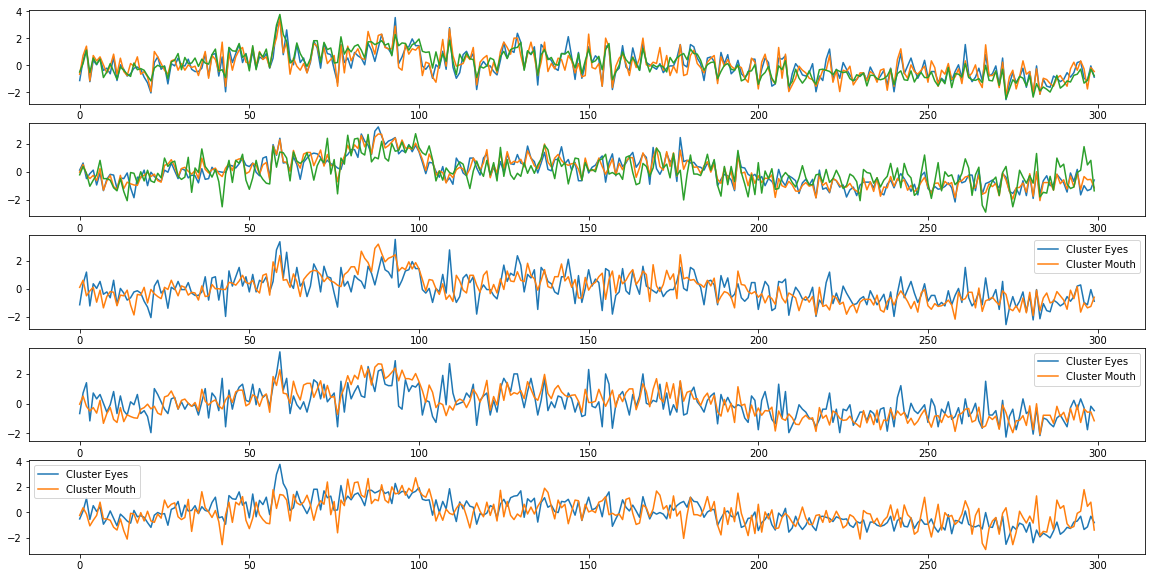

In [82]:
plt.figure(figsize=(20, 10))
plt.subplot(5,1,1)
plt.plot(slice_10_data_eyes[0])
plt.plot(slice_10_data_eyes[1])
plt.plot(slice_10_data_eyes[2])
plt.subplot(5,1,2)
plt.plot(slice_10_data_mouth[0])
plt.plot(slice_10_data_mouth[1])
plt.plot(slice_10_data_mouth[2])
plt.subplot(5,1,3)
plt.plot(slice_10_data_eyes[0], label='Cluster Eyes')
plt.plot(slice_10_data_mouth[0], label='Cluster Mouth')
plt.legend()
plt.subplot(5,1,4)
plt.plot(slice_10_data_eyes[1], label='Cluster Eyes')
plt.plot(slice_10_data_mouth[1], label='Cluster Mouth')
plt.legend()
plt.subplot(5,1,5)
plt.plot(slice_10_data_eyes[2], label='Cluster Eyes')
plt.plot(slice_10_data_mouth[2], label='Cluster Mouth')
plt.legend()
